In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import matplotlib

In [60]:
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

df_url = '/Users/alonagmon/MyData/work/credit_card_fraud_ds.csv'

In [61]:
data = pd.read_csv(df_url)

In [62]:
data['Class'].value_counts() / len(data)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [63]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1]);

In [65]:
fraud_samples_n = len(data[data.Class==1])

fraud_ix = np.array (data[data.Class==1].index)
normal_ix = np.array (data[data.Class==0].index)

In [66]:
undersam_normal_ix = np.random.choice (normal_ix, fraud_samples_n, replace = False )

undersam_ix = np.concatenate ([fraud_ix, undersam_normal_ix])

In [67]:
u_data = data.iloc[undersam_ix,:]

In [71]:
u_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [77]:
X = u_data.iloc[:,:-1]
y = u_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123)

In [78]:
xgb = XGBClassifier(learning_rate =0.01, n_estimators=1000, objective= 'binary:logistic', max_depth=5)

In [79]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
y_pred = xgb.predict(X_test)
y_pred_p = xgb.predict_proba(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       406
           1       0.96      0.91      0.93       382

    accuracy                           0.94       788
   macro avg       0.94      0.94      0.94       788
weighted avg       0.94      0.94      0.94       788



<AxesSubplot:>

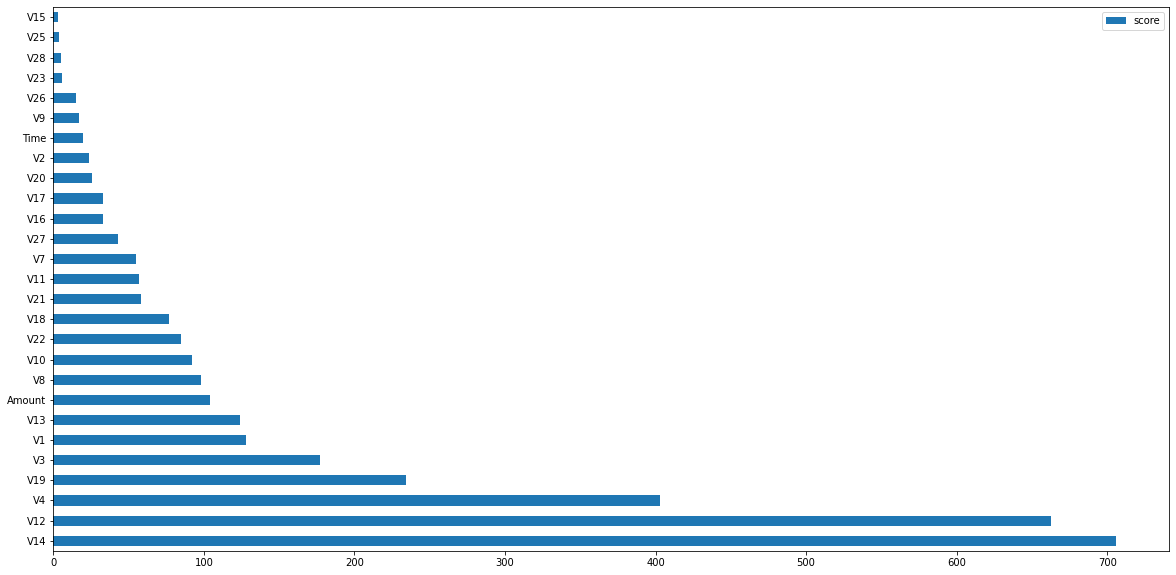

In [83]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [84]:
xgb.save_model('fraud_model.bin')

In [88]:
X_test.to_csv("test_set.csv", header=False)

In [91]:
X_test.shape

(788, 30)

In [90]:
!pwd

/Users/alonagmon/MyData/work/golang-projects/vectors_model
